In [1]:
import helpful_functions as hf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, losses
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data_set
# data_set = hf.load_dataset_npz('data_set/loop_test_10images_(5-15).npz')
data_set = hf.load_dataset_npz('data_set/loops_test_64pix_3-8_2.npz')
samples = data_set
x_test0 = samples[:, 0:2]
#x_test0 = np.expand_dims(x_test0, axis=0)
x_test = samples[:, 2:]
#x_test = np.expand_dims(x_test,axis=1)
all_images = samples[:,8]
print(f"data_set shape is {data_set.shape}")
print(f"samples shape is {np.shape(samples)}")
print(f"x_test0 shape is {np.shape(x_test0)}")
print(f"x_test shape is {np.shape(x_test)}")
print(f"all_images shape is {np.shape(all_images)}")

data_set shape is (10, 9, 64, 64, 1)
samples shape is (10, 9, 64, 64, 1)
x_test0 shape is (10, 2, 64, 64, 1)
x_test shape is (10, 7, 64, 64, 1)
all_images shape is (10, 64, 64, 1)


In [10]:
loops = 5

In [11]:
#autoencoder = keras.models.load_model("saved_model/2Inputs_(10x10x16)_64pix")
autoencoder = keras.models.load_model("saved_model/autoencoder_80batch_lr001_40epochs")

predictions = autoencoder.predict([x_test0[:,0], x_test0[:,1]])
print(np.shape(predictions))
for j in range(loops):
    predictions = autoencoder.predict([x_test[:,j], predictions[2]])

2023-06-26 17:46:40.787440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 391ms/step
(3, 10, 64, 64, 1)
1/1 [==============================] - 0s 22ms/step


autoencoder2 = keras.models.load_model("saved_model/2Inputs_(10x10x16)_64pix_bs80_ratio05_1302")

predictions2 = autoencoder2.predict([x_test0[:,0], x_test0[:,1]])
print(np.shape(predictions2))
for j in range(loops):
    predictions2 = autoencoder2.predict([x_test[:,j], predictions2[2]])

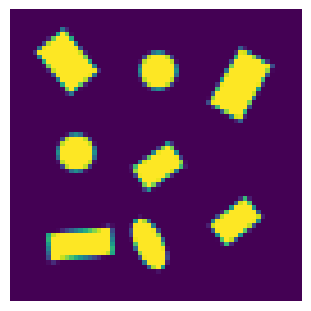

In [26]:
num = 8
fig, ax = plt.subplots(figsize=(3, 3), constrained_layout=True)
ax.imshow(all_images[num], origin='lower')
#ax.set_title('Erwartetes Bild')
ax.axis('off')
plt.savefig("Ausarbeitung/graphic/loop_ori.svg")

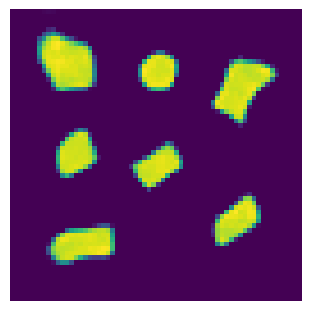

In [13]:
num = 8
fig, ax = plt.subplots(figsize=(3, 3), constrained_layout=True)
ax.imshow(predictions[2][num], origin='lower')
#ax.set_title('reconstructed image')
ax.axis('off')
plt.savefig("Ausarbeitung/graphic/loop5.svg")

'\nax[1].imshow(predictions[2][num], origin=\'lower\')\nax[1].set_title(\'reconstructed image\')\nax[1].axis(\'off\')\n#plt.savefig("Ausarbeitung/graphic/loop.svg")\n'

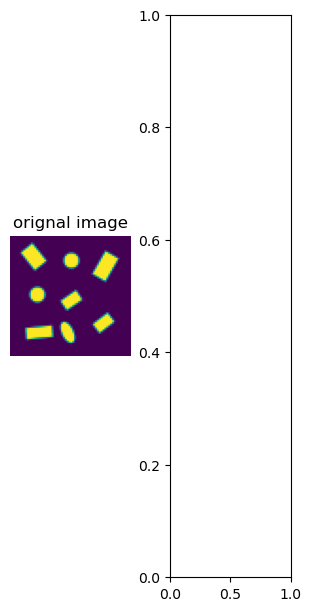

In [22]:
num = 8
fig, ax = plt.subplots(1, 2, figsize=(3, 6), constrained_layout=True)
ax[0].imshow(all_images[num], origin='lower')
ax[0].set_title('orignal image')
ax[0].axis('off')
#plt.savefig("Ausarbeitung/graphic/loop.svg")
"""
ax[1].imshow(predictions[2][num], origin='lower')
ax[1].set_title('reconstructed image')
ax[1].axis('off')
#plt.savefig("Ausarbeitung/graphic/loop.svg")
"""

num = 1
fig, ax = plt.subplots(1, 2, figsize=(3, 6), constrained_layout=True)
ax[0].imshow(all_images[num], origin='lower')
ax[0].set_title('orignal image')
ax[0].axis('off')
ax[1].imshow(predictions2[2][num], origin='lower')
ax[1].set_title('reconstructed image')
ax[1].axis('off')